# Projeto de Técnicas de Programação I
Você trabalha em uma consultoria de dados que foi contratada para realizar a distribuição de materiais didáticos nas escolas da cidade do Rio de Janeiro. Sua missão é realizar tratamentos nos dados de acordo com as normas de padrão definidas pelo cliente e encontrar qual a melhor rota que um caminhão deve realizar para entregar os materiais didáticos de forma a otimizar o seu percurso.

* Para esse projeto você recebeu três arquivos:

escolas.csv: contém os dados das escolas. [Baixe o dataset aqui;](https://s3-sa-east-1.amazonaws.com/lcpi/5c790ffd-ddeb-4cfa-a2a1-f2fc3fbc2016.csv)

subprefeituras.csv: contém dados de quais bairros pertem a cada subprefeitura. [Baixe o dataset aqui;](https://s3-sa-east-1.amazonaws.com/lcpi/2c9f4b63-b826-4c89-b681-a741081a493a.csv)

material_didatico.csv: contém a quantidade de material didático que cada escola deve receber. [Baixe o dataset aqui.](https://s3-sa-east-1.amazonaws.com/lcpi/005c3bc7-11e5-4075-a473-d26893619284.csv)

* Como produto final, você deve entregar:

Um arquivo csv no qual as linhas já estarão ordenas de acordo com a rota a ser seguida.

Além disso, os dados devem estar no padrão especificado abaixo e contendo as seguintes colunas: id da escola, nome da escola, tipo da escola (EM, CIEP ou colégio), logradouro da entrega, número, bairro, subprefeitura, latitude, longitude e quantidade de material didático que deve ser entregue.

O logradouro da escola deve estar em uma coluna diferente do número;

Um arquivo csv com a quantidade total de material escolar por subprefeitura para que sejam contabilizados os custos por subprefeitura.

* Como padrão dos dados, considere:

nome das colunas em snake_case;

strings não devem conter acentos;

todas as strings devem estar em maiúsculo;

padronização do nome dos logradouros sem abreviação (Ex: R. deve estar como Rua);

latitude e longitude devem conter apenas 5 casas decimais;

os ids da escola devem todos ser strings com 3 caracteres (Ex: '024');

* Desafio:

Entregar um plot com a representação da melhor rota que você encontrou, por exemplo:

![](Https://s3-sa-east-1.amazonaws.com/lcpi/b888027e-95e8-48e5-a6ac-07ca0be68fc4.png)

carregando e lendos os arquivos

In [1]:
!pip install unidecode

In [2]:
# Importando bibliotecas
import pandas as pd
import math
import re
from unidecode import unidecode

In [3]:
# URL dos Datasets
url_escolas = "https://s3-sa-east-1.amazonaws.com/lcpi/5c790ffd-ddeb-4cfa-a2a1-f2fc3fbc2016.csv"
url_subprefeituras = "https://s3-sa-east-1.amazonaws.com/lcpi/2c9f4b63-b826-4c89-b681-a741081a493a.csv"
url_material_didatico = "https://s3-sa-east-1.amazonaws.com/lcpi/005c3bc7-11e5-4075-a473-d26893619284.csv"

# Carregando os dados
escolas_df = pd.read_csv(url_escolas , encoding='utf-8')
subprefeituras_df = pd.read_csv(url_subprefeituras, encoding='utf-8')
material_didatico_df = pd.read_csv(url_material_didatico, encoding='utf-8')

In [4]:
escolas_df.head()

,id,Escolas_Postos,BAIRRO,ENDEREÇO,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. do Lavradio, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,"-22,924412","-43,208579"


In [5]:
subprefeituras_df.head()

,nome,subprefeitura
0,Santo Cristo,Centro
1,Gamboa,Centro
2,Saúde,Centro
3,Caju,Centro
4,Centro,Centro


In [6]:
material_didatico_df.head()

,id,Quantidade
0,178,20
1,634,121
2,483,220
3,476,190
4,132,67


In [7]:
# Fazendo backup dos dados
escolas = escolas_df
subprefeituras = subprefeituras_df
material_didatico = material_didatico_df

In [8]:
escolas

,id,Escolas_Postos,BAIRRO,ENDEREÇO,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. do Lavradio, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,"-22,924412","-43,208579"
...,...,...,...,...,...,...
147,474,EM ENGENHEIRO GASTÃO RANGEL,GUARATIBA,Estrada Do Magarça 9.183,"-22,98046","-43,643545"
148,301,EM JONATAS SERRANO,GUARATIBA,"Estrada Do Mato Alto, S/Nº","-22,953163","-43,577409"
149,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,Estrada Teodoreto de Camargo S/N.º,"-23,009084","-43,537582"
150,606,EM PROFESSOR CASTILHO,ILHA DE GUARATIBA,Caminho da Matriz 4406,"-22,994124","-43,593683"


In [9]:
subprefeituras

,nome,subprefeitura
0,Santo Cristo,Centro
1,Gamboa,Centro
2,Saúde,Centro
3,Caju,Centro
4,Centro,Centro
...,...,...
159,Santa Cruz,Zona Oeste
160,Guaratiba,Zona Oeste
161,Barra de Guaratiba,Zona Oeste
162,Pedra de Guaratiba,Zona Oeste


In [10]:
material_didatico

,id,Quantidade
0,178,20
1,634,121
2,483,220
3,476,190
4,132,67
...,...,...
146,474,320
147,301,335
148,215,NaN
149,606,521


ajustes

In [11]:
# Renomeando coluna "ENDEREÇO" do DataFrame 'escolas'
escolas.columns.values[3] = 'logradouro'

# Renomeando as demais colunas
escolas.rename(columns={'Escolas_Postos':'nome_escola',
                        'BAIRRO':'bairro',
                        'lat':'latitude',
                        'lon':'longitude'},
                        inplace=True)

# Convertendo strings em letras maiúsculas
escolas = escolas.applymap(lambda x: x.upper() if isinstance(x, str) else x)

escolas

,id,nome_escola,bairro,logradouro,latitude,longitude
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,RUA CARLOS SEIDL S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA ÉBANO 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. DO LAVRADIO, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,PRAÇA ARGENTINA 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRAÇA CONDESSA PAULO DE FRONTIN 45,"-22,924412","-43,208579"
...,...,...,...,...,...,...
147,474,EM ENGENHEIRO GASTÃO RANGEL,GUARATIBA,ESTRADA DO MAGARÇA 9.183,"-22,98046","-43,643545"
148,301,EM JONATAS SERRANO,GUARATIBA,"ESTRADA DO MATO ALTO, S/Nº","-22,953163","-43,577409"
149,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO S/N.º,"-23,009084","-43,537582"
150,606,EM PROFESSOR CASTILHO,ILHA DE GUARATIBA,CAMINHO DA MATRIZ 4406,"-22,994124","-43,593683"


In [12]:
# Renomeando coluna "nome" do DataFrame 'subprefeituras'
subprefeituras.rename(columns={'nome':'bairro'}, inplace=True)

# Convertendo strings em maiúsculas
subprefeituras = subprefeituras.applymap(lambda x: x.upper() if isinstance(x, str) else x)

subprefeituras

,bairro,subprefeitura
0,SANTO CRISTO,CENTRO
1,GAMBOA,CENTRO
2,SAÚDE,CENTRO
3,CAJU,CENTRO
4,CENTRO,CENTRO
...,...,...
159,SANTA CRUZ,ZONA OESTE
160,GUARATIBA,ZONA OESTE
161,BARRA DE GUARATIBA,ZONA OESTE
162,PEDRA DE GUARATIBA,ZONA OESTE


In [13]:
# Renomeando coluna "Quantidade" do DataFrame 'material_didatico'
material_didatico.rename(columns={'Quantidade':'quantidade_material_didatico'}, inplace=True)

material_didatico

,id,quantidade_material_didatico
0,178,20
1,634,121
2,483,220
3,476,190
4,132,67
...,...,...
146,474,320
147,301,335
148,215,NaN
149,606,521


merge

In [14]:
# Unindo os DataFrames com base nas colunas "bairro" e "id"
df_final = escolas.merge(subprefeituras, on='bairro', how='left')
df_final = df_final.merge(material_didatico, on='id', how='left')

df_final

,id,nome_escola,bairro,logradouro,latitude,longitude,subprefeitura,quantidade_material_didatico
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,RUA CARLOS SEIDL S/Nº,"-22,880888","-43,225326",CENTRO,20
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA ÉBANO 187,"-22,889574","-43,236202",CENTRO,121
2,483,EM CELESTINO SILVA,CENTRO,"R. DO LAVRADIO, 56","-22,909293","-43,183579",CENTRO,220
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,PRAÇA ARGENTINA 20,"-22,897629","-43,227456",CENTRO,190
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRAÇA CONDESSA PAULO DE FRONTIN 45,"-22,924412","-43,208579",CENTRO,67
...,...,...,...,...,...,...,...,...
147,474,EM ENGENHEIRO GASTÃO RANGEL,GUARATIBA,ESTRADA DO MAGARÇA 9.183,"-22,98046","-43,643545",ZONA OESTE,320
148,301,EM JONATAS SERRANO,GUARATIBA,"ESTRADA DO MATO ALTO, S/Nº","-22,953163","-43,577409",ZONA OESTE,335
149,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO S/N.º,"-23,009084","-43,537582",ZONA OESTE,NaN
150,606,EM PROFESSOR CASTILHO,ILHA DE GUARATIBA,CAMINHO DA MATRIZ 4406,"-22,994124","-43,593683",ZONA OESTE,521


In [15]:
# Fazendo backup dos dados
merge = df_final

tratamentos

In [16]:
# Removendo linhas duplicadas e atualizar o DataFrame
df_final = df_final.drop_duplicates()

# Redefinindo o índice do DataFrame
df_final = df_final.reset_index(drop=True)

df_final

,id,nome_escola,bairro,logradouro,latitude,longitude,subprefeitura,quantidade_material_didatico
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,RUA CARLOS SEIDL S/Nº,"-22,880888","-43,225326",CENTRO,20
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA ÉBANO 187,"-22,889574","-43,236202",CENTRO,121
2,483,EM CELESTINO SILVA,CENTRO,"R. DO LAVRADIO, 56","-22,909293","-43,183579",CENTRO,220
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,PRAÇA ARGENTINA 20,"-22,897629","-43,227456",CENTRO,190
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRAÇA CONDESSA PAULO DE FRONTIN 45,"-22,924412","-43,208579",CENTRO,67
...,...,...,...,...,...,...,...,...
134,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,RUA BELCHIOR DA FONSECA 643,"-23,001416","-43,638757",ZONA OESTE,570
135,474,EM ENGENHEIRO GASTÃO RANGEL,GUARATIBA,ESTRADA DO MAGARÇA 9.183,"-22,98046","-43,643545",ZONA OESTE,320
136,301,EM JONATAS SERRANO,GUARATIBA,"ESTRADA DO MATO ALTO, S/Nº","-22,953163","-43,577409",ZONA OESTE,335
137,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO S/N.º,"-23,009084","-43,537582",ZONA OESTE,NaN


In [17]:
# Removendo caracteres especiais das colunas "logradouro" e "nome_escola"
df_final['logradouro'] = df_final['logradouro'].str.replace('[,.º°/]', '', regex=True)
df_final['nome_escola'] = df_final['nome_escola'].str.replace('[,.º°/]', '', regex=True)

df_final

,id,nome_escola,bairro,logradouro,latitude,longitude,subprefeitura,quantidade_material_didatico
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,RUA CARLOS SEIDL SN,"-22,880888","-43,225326",CENTRO,20
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA ÉBANO 187,"-22,889574","-43,236202",CENTRO,121
2,483,EM CELESTINO SILVA,CENTRO,R DO LAVRADIO 56,"-22,909293","-43,183579",CENTRO,220
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,PRAÇA ARGENTINA 20,"-22,897629","-43,227456",CENTRO,190
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRAÇA CONDESSA PAULO DE FRONTIN 45,"-22,924412","-43,208579",CENTRO,67
...,...,...,...,...,...,...,...,...
134,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,RUA BELCHIOR DA FONSECA 643,"-23,001416","-43,638757",ZONA OESTE,570
135,474,EM ENGENHEIRO GASTÃO RANGEL,GUARATIBA,ESTRADA DO MAGARÇA 9183,"-22,98046","-43,643545",ZONA OESTE,320
136,301,EM JONATAS SERRANO,GUARATIBA,ESTRADA DO MATO ALTO SN,"-22,953163","-43,577409",ZONA OESTE,335
137,215,EM NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO SN,"-23,009084","-43,537582",ZONA OESTE,NaN


In [18]:
# Removendo acentos das strings
df_final = df_final.applymap(lambda x: unidecode(x) if isinstance(x, str) else x)

df_final

,id,nome_escola,bairro,logradouro,latitude,longitude,subprefeitura,quantidade_material_didatico
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL SN,"-22,880888","-43,225326",CENTRO,20
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,"-22,889574","-43,236202",CENTRO,121
2,483,EM CELESTINO SILVA,CENTRO,R DO LAVRADIO 56,"-22,909293","-43,183579",CENTRO,220
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA 20,"-22,897629","-43,227456",CENTRO,190
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN 45,"-22,924412","-43,208579",CENTRO,67
...,...,...,...,...,...,...,...,...
134,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,RUA BELCHIOR DA FONSECA 643,"-23,001416","-43,638757",ZONA OESTE,570
135,474,EM ENGENHEIRO GASTAO RANGEL,GUARATIBA,ESTRADA DO MAGARCA 9183,"-22,98046","-43,643545",ZONA OESTE,320
136,301,EM JONATAS SERRANO,GUARATIBA,ESTRADA DO MATO ALTO SN,"-22,953163","-43,577409",ZONA OESTE,335
137,215,EM NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO SN,"-23,009084","-43,537582",ZONA OESTE,NaN


logradouro

In [19]:
# Dicionário de mapeamento de abreviações para nomes completos
mapeamento = {
    '^R\\b':'RUA',
    '^AV\\b':'AVENIDA',
    '^PCA\\b':'PRACA',
    '^ESTR\\b':'ESTRADA',
}

# Aplicar a padronização dos logradouros usando replace
df_final['logradouro'] = df_final['logradouro'].replace(mapeamento, regex=True)

df_final

,id,nome_escola,bairro,logradouro,latitude,longitude,subprefeitura,quantidade_material_didatico
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL SN,"-22,880888","-43,225326",CENTRO,20
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,"-22,889574","-43,236202",CENTRO,121
2,483,EM CELESTINO SILVA,CENTRO,RUA DO LAVRADIO 56,"-22,909293","-43,183579",CENTRO,220
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA 20,"-22,897629","-43,227456",CENTRO,190
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN 45,"-22,924412","-43,208579",CENTRO,67
...,...,...,...,...,...,...,...,...
134,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,RUA BELCHIOR DA FONSECA 643,"-23,001416","-43,638757",ZONA OESTE,570
135,474,EM ENGENHEIRO GASTAO RANGEL,GUARATIBA,ESTRADA DO MAGARCA 9183,"-22,98046","-43,643545",ZONA OESTE,320
136,301,EM JONATAS SERRANO,GUARATIBA,ESTRADA DO MATO ALTO SN,"-22,953163","-43,577409",ZONA OESTE,335
137,215,EM NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO SN,"-23,009084","-43,537582",ZONA OESTE,NaN


In [20]:
df_final['logradouro'].unique()

array(['RUA CARLOS SEIDL SN', 'RUA EBANO 187', 'RUA DO LAVRADIO 56',
       'PRACA ARGENTINA 20', 'PRACA CONDESSA PAULO DE FRONTIN 45',
       'RUA BARAO DA TORRE 90', 'RUA EDUARDO SANTOS 38',
       'AVENIDA PRESIDENTE VARGAS SN', 'RUA ANA NERI 192',
       'RUA HADDOCK LOBO 148', 'RUA VISCONDE DE SILVA SN',
       'RUA DO CATETE 77', 'AVENIDA OSWALDO CRUZ 124',
       'AVENIDA ATLANTICA 1976', 'RUA BARAO DE IPANEMA 34',
       'AVENIDA EPITACIO PESSOA 474', 'RUA DA MATRIZ 67',
       'AVENIDA PASTEUR 433', 'RUA ASSUNCAO 257', 'RUA SEN CORREA',
       'AVENIDA HEITOR BELTRAO SN', 'RUA FERREIRA PONTES 328',
       'RUA BARAO DE UBA 331', 'RUA MAL JOFRE 74',
       'BOULEVARD 28 DE SETEMBRO 353', 'RUA ANTONIO BASILIO 370',
       'RUA ENES DE SOUSA 36', 'RUA OITO DE DEZEMBRO 275',
       'RUA ALM JOAO CANDIDO BRASIL 352',
       'AVENIDA PRESIDENTE JOAO GOULART 296', 'RUA MARTAGAO GESTEIRA SN',
       'RUA CIRNE MAIA 109', 'RUA HUMBERTO DE CAMPOS SN',
       'AVENIDA DOM HELDER CAMARA 6

In [21]:
# Criando uma função para quebrar o endereço e criar as colunas logradouro_entrega e numero
def quebrar_endereco(endereco):

    # Se o endereço contém "SN", dividimos a string em "SN" e o restante
    if 'SN' in endereco:
        partes = endereco.split('SN', 1)
        logradouro_entrega = partes[0].strip()
        numero = 'SN ' + partes[1].strip()
    else:
        # Se não contém "SN", dividimos o endereço em partes
        partes = endereco.split()
        numero = ''
        logradouro_entrega = ''

        # Procuramos pela parte que contém caracteres numéricos
        for parte in partes:
            if any(char.isdigit() for char in parte):
                numero = parte
                break

        # Se encontramos um número, o resto vai para a coluna 'logradouro_entrega'
        if numero:
            index_numero = partes.index(numero)
            logradouro_entrega = ' '.join(partes[:index_numero])
        else:
            # Se não encontramos número, o endereço inteiro vai para 'logradouro_entrega' e 'numero' é definido como "SN"
            logradouro_entrega = endereco
            numero = 'SN'

    return pd.Series([logradouro_entrega, numero], index=['logradouro_entrega', 'numero'])

# Aplicando a função ao DataFrame
df_final[['logradouro_entrega', 'numero']] = df_final['logradouro'].apply(quebrar_endereco)

df_final

,id,nome_escola,bairro,logradouro,latitude,longitude,subprefeitura,quantidade_material_didatico,logradouro_entrega,numero
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL SN,"-22,880888","-43,225326",CENTRO,20,RUA CARLOS SEIDL,SN
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,"-22,889574","-43,236202",CENTRO,121,RUA EBANO,187
2,483,EM CELESTINO SILVA,CENTRO,RUA DO LAVRADIO 56,"-22,909293","-43,183579",CENTRO,220,RUA DO LAVRADIO,56
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA 20,"-22,897629","-43,227456",CENTRO,190,PRACA ARGENTINA,20
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN 45,"-22,924412","-43,208579",CENTRO,67,PRACA CONDESSA PAULO DE FRONTIN,45
...,...,...,...,...,...,...,...,...,...,...
134,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,RUA BELCHIOR DA FONSECA 643,"-23,001416","-43,638757",ZONA OESTE,570,RUA BELCHIOR DA FONSECA,643
135,474,EM ENGENHEIRO GASTAO RANGEL,GUARATIBA,ESTRADA DO MAGARCA 9183,"-22,98046","-43,643545",ZONA OESTE,320,ESTRADA DO MAGARCA,9183
136,301,EM JONATAS SERRANO,GUARATIBA,ESTRADA DO MATO ALTO SN,"-22,953163","-43,577409",ZONA OESTE,335,ESTRADA DO MATO ALTO,SN
137,215,EM NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO SN,"-23,009084","-43,537582",ZONA OESTE,NaN,ESTRADA TEODORETO DE CAMARGO,SN


In [22]:
#Removendo coluna 'logradouro'
df_final = df_final.drop('logradouro', axis=1)

df_final

,id,nome_escola,bairro,latitude,longitude,subprefeitura,quantidade_material_didatico,logradouro_entrega,numero
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,"-22,880888","-43,225326",CENTRO,20,RUA CARLOS SEIDL,SN
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,"-22,889574","-43,236202",CENTRO,121,RUA EBANO,187
2,483,EM CELESTINO SILVA,CENTRO,"-22,909293","-43,183579",CENTRO,220,RUA DO LAVRADIO,56
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,"-22,897629","-43,227456",CENTRO,190,PRACA ARGENTINA,20
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,"-22,924412","-43,208579",CENTRO,67,PRACA CONDESSA PAULO DE FRONTIN,45
...,...,...,...,...,...,...,...,...,...
134,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,"-23,001416","-43,638757",ZONA OESTE,570,RUA BELCHIOR DA FONSECA,643
135,474,EM ENGENHEIRO GASTAO RANGEL,GUARATIBA,"-22,98046","-43,643545",ZONA OESTE,320,ESTRADA DO MAGARCA,9183
136,301,EM JONATAS SERRANO,GUARATIBA,"-22,953163","-43,577409",ZONA OESTE,335,ESTRADA DO MATO ALTO,SN
137,215,EM NARCISA AMALIA,ILHA DE GUARATIBA,"-23,009084","-43,537582",ZONA OESTE,NaN,ESTRADA TEODORETO DE CAMARGO,SN


In [23]:
df_final['logradouro_entrega'].unique()

array(['RUA CARLOS SEIDL', 'RUA EBANO', 'RUA DO LAVRADIO',
       'PRACA ARGENTINA', 'PRACA CONDESSA PAULO DE FRONTIN',
       'RUA BARAO DA TORRE', 'RUA EDUARDO SANTOS',
       'AVENIDA PRESIDENTE VARGAS', 'RUA ANA NERI', 'RUA HADDOCK LOBO',
       'RUA VISCONDE DE SILVA', 'RUA DO CATETE', 'AVENIDA OSWALDO CRUZ',
       'AVENIDA ATLANTICA', 'RUA BARAO DE IPANEMA',
       'AVENIDA EPITACIO PESSOA', 'RUA DA MATRIZ', 'AVENIDA PASTEUR',
       'RUA ASSUNCAO', 'RUA SEN CORREA', 'AVENIDA HEITOR BELTRAO',
       'RUA FERREIRA PONTES', 'RUA BARAO DE UBA', 'RUA MAL JOFRE',
       'BOULEVARD', 'RUA ANTONIO BASILIO', 'RUA ENES DE SOUSA',
       'RUA OITO DE DEZEMBRO', 'RUA ALM JOAO CANDIDO BRASIL',
       'AVENIDA PRESIDENTE JOAO GOULART', 'RUA MARTAGAO GESTEIRA',
       'RUA CIRNE MAIA', 'RUA HUMBERTO DE CAMPOS',
       'AVENIDA DOM HELDER CAMARA', 'RUA VIOLETA', 'RUA ASSIS CARNEIRO',
       'RUA CONEGO TOBIAS', 'RUA ADOLFO BERGAMINI',
       'RUA VINTE QUATRO DE MAIO', 'PRACA FREDERICO DUVAL',

In [24]:
df_final['numero'].unique()

array(['SN ', '187', '56', '20', '45', '90', '38', '192', '148', '77',
       '124', '1976', '34', '474', '67', '433', '257', 'SN', '328', '331',
       '74', '28', '370', '36', '275', '352', '296', '109', '6742', '649',
       '116', '201', '931', '1715', '1870', '98', '579', '268', '54',
       '100', '130', '15', '91', '407', '1215', '49', '4040', '401',
       '1386', '40', '4035', '23364', '105', '260', '1614', '483-639',
       '500', '316', '170', '1446', '1565', '495', '3327', '387', '78',
       '196', '12', '43', 'SN RUA 3', '155', '113', '30', '866', '604',
       '97', 'SN KM 10 MENDANHA', '138', '750', 'SN CONJ URUCANIA',
       'SN CONJ CESARAO', 'SN BLOCO 1', '2075', '643', '9183', '4406'],
      dtype=object)

latitude e longitude

In [25]:
# Limitando as colunas 'latitude' e 'longitude' a cinco (5) caracteres após a vírgula (,)
df_final[['latitude', 'longitude']] = df_final[['latitude', 'longitude']].applymap(lambda x: f"{x.split(',')[0]},{x.split(',')[1][:5]}" if isinstance(x, str) and ',' in x else x)

df_final

,id,nome_escola,bairro,latitude,longitude,subprefeitura,quantidade_material_didatico,logradouro_entrega,numero
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,"-22,88088","-43,22532",CENTRO,20,RUA CARLOS SEIDL,SN
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,"-22,88957","-43,23620",CENTRO,121,RUA EBANO,187
2,483,EM CELESTINO SILVA,CENTRO,"-22,90929","-43,18357",CENTRO,220,RUA DO LAVRADIO,56
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,"-22,89762","-43,22745",CENTRO,190,PRACA ARGENTINA,20
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,"-22,92441","-43,20857",CENTRO,67,PRACA CONDESSA PAULO DE FRONTIN,45
...,...,...,...,...,...,...,...,...,...
134,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,"-23,00141","-43,63875",ZONA OESTE,570,RUA BELCHIOR DA FONSECA,643
135,474,EM ENGENHEIRO GASTAO RANGEL,GUARATIBA,"-22,98046","-43,64354",ZONA OESTE,320,ESTRADA DO MAGARCA,9183
136,301,EM JONATAS SERRANO,GUARATIBA,"-22,95316","-43,57740",ZONA OESTE,335,ESTRADA DO MATO ALTO,SN
137,215,EM NARCISA AMALIA,ILHA DE GUARATIBA,"-23,00908","-43,53758",ZONA OESTE,NaN,ESTRADA TEODORETO DE CAMARGO,SN


In [26]:
df_final['latitude'].unique()

array(['-22,88088', '-22,88957', '-22,90929', '-22,89762', '-22,92441',
       '-22,98333', '-22,91553', '-22,90712', '-22,89848', '-22,91723',
       '-22,95916', '-22,92278', '-22,94071', '-22,96864', '-22,97482',
       '-22,74828', '-22,98195', '-22,95270', '-22,95382', '-22,94555',
       '-22,93398', '-22,92127', '-22,92685', '-22,91544', '-22,91854',
       '-22,91615', '-22,92684', '-22,92906', '-22,90982', '-22,91682',
       '-22,99369', '-22,99741', '-22,89203', '-22,98155', '-22,88133',
       '-22,90627', '-22,89508', '-22,90070', '-22,90416', '-22,90034',
       '-22,90303', '-22,88766', '-22,89417', '-22,87835', '-22,88531',
       '-22,87389', '-22,81527', '-22,87757', '-22,88417', '-22,88098',
       '-22,80944', '-22,83941', '-22,84779', '-22,89557', '-22,84562',
       '-22,83566', '-22,84858', '-22,83896', '-22,85386', '-22,82994',
       '-22,85713', '-22,85782', '-22,86047', '-22,87373', '-22,87608',
       '-22,81631', '-22,80769', '-22,81244', '-22,81389', '-22,

In [27]:
df_final['longitude'].unique()

array(['-43,22532', '-43,23620', '-43,18357', '-43,22745', '-43,20857',
       '-43,19903', '-43,19158', '-43,19506', '-43,23775', '-43,21104',
       '-43,19972', '-43,17668', '-43,17647', '-43,18113', '-43,18906',
       '-43,21357', '-43,19176', '-43,16888', '-43,18659', '-43,18101',
       '-43,22799', '-43,25491', '-43,21109', '-43,26509', '-43,24704',
       '-43,23788', '-43,23287', '-43,23939', '-43,23692', '-43,23557',
       '-43,27218', '-43,27992', '-43,21702', '-43,29409', '-43,30791',
       '-43,31382', '-43,25540', '-43,28033', '-43,29594', '-43,26788',
       '-43,30246', '-43,26384', '-43,27488', '-43,25410', '-43,27771',
       '-43,30356', '-43,28562', '-43,26262', '-43,25324', '-43,32629',
       '-43,30006', '-43,26144', '-43,57050', '-43,28400', '-43,28815',
       '-43,26858', '-43,27517', '-43,25245', '-43,28210', '-43,26416',
       '-43,24045', '-43,25428', '-43,24071', '-43,34336', '-43,34014',
       '-43,18155', '-43,20965', '-43,37392', '-43,39207', '-43,

In [28]:
# Corrigindo valores das colunas 'longitude' e 'latitude'
df_final['longitude'] = df_final['longitude'].str.replace('-43352667', '-43,35266')
df_final['latitude'] = df_final['latitude'].str.replace('-22896931', '-22,89693')

# Substituindo vírgulas por pontos e convertendo para float
df_final['latitude'] = df_final['latitude'].str.replace(',', '.').astype(float)
df_final['longitude'] = df_final['longitude'].str.replace(',', '.').astype(float)

id

In [29]:
# Garantindo que a coluna 'id' possua 3 caracteres
df_final['id'] = df_final['id'].astype(str).str.zfill(3)

# Transformando a coluna para uma coluna de strings
df_final['id'] = df_final['id'].astype(str)

df_final

,id,nome_escola,bairro,latitude,longitude,subprefeitura,quantidade_material_didatico,logradouro_entrega,numero
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,-22.88088,-43.22532,CENTRO,20,RUA CARLOS SEIDL,SN
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,-22.88957,-43.23620,CENTRO,121,RUA EBANO,187
2,483,EM CELESTINO SILVA,CENTRO,-22.90929,-43.18357,CENTRO,220,RUA DO LAVRADIO,56
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,-22.89762,-43.22745,CENTRO,190,PRACA ARGENTINA,20
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,-22.92441,-43.20857,CENTRO,67,PRACA CONDESSA PAULO DE FRONTIN,45
...,...,...,...,...,...,...,...,...,...
134,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,-23.00141,-43.63875,ZONA OESTE,570,RUA BELCHIOR DA FONSECA,643
135,474,EM ENGENHEIRO GASTAO RANGEL,GUARATIBA,-22.98046,-43.64354,ZONA OESTE,320,ESTRADA DO MAGARCA,9183
136,301,EM JONATAS SERRANO,GUARATIBA,-22.95316,-43.57740,ZONA OESTE,335,ESTRADA DO MATO ALTO,SN
137,215,EM NARCISA AMALIA,ILHA DE GUARATIBA,-23.00908,-43.53758,ZONA OESTE,NaN,ESTRADA TEODORETO DE CAMARGO,SN


In [30]:
df_final['id'].unique()

array(['178', '634', '483', '476', '132', '017', '055', '490', '600',
       '089', '387', '331', '450', '558', '413', '540', '309', '268',
       '523', '035', '011', '226', '638', '126', '180', '163', '361',
       '280', '060', '587', '653', '660', '382', '217', '378', '429',
       '025', '373', '624', '157', '020', '117', '502', '351', '135',
       '388', '440', '259', '422', '041', '537', '230', '379', '146',
       '566', '498', '663', '121', '161', '263', '118', '140', '260',
       '069', '090', '274', '676', '390', '608', '589', '256', '091',
       '248', '623', '603', '673', '520', '412', '031', '514', '023',
       '415', '016', '570', '528', '414', '690', '202', '550', '211',
       '206', '492', '466', '636', '527', '586', '080', '398', '175',
       '308', '576', '495', '641', '689', '171', '477', '687', '568',
       '399', '255', '262', '616', '320', '144', '534', '342', '052',
       '139', '323', '573', '560', '246', '319', '584', '311', '316',
       '497', '297',

nome e tipo_escola

In [31]:
df_final['nome_escola'].unique()

array(['CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL',
       'EM ALICE DO AMARAL PEIXOTO', 'EM CELESTINO SILVA',
       'ESCOLA MUNICIPAL FLORIANO PEIXOTO', 'EM PEREIRA PASSOS',
       'EM PRESIDENTE JOSE LINHARES', 'EM SANTA CATARINA', 'EM TIA CIATA',
       'EM URUGUAI', 'EM MARIO CLAUDIO', 'CIEP PRESIDENTE AGOSTINHO NETO',
       'CIEP TANCREDO NEVES', 'EM ALBERTO BARTH', 'EM CICERO PENA',
       'EM COCIO BARCELOS', 'EM HENRIQUE DODSWORTH', 'EM MEXICO',
       'ESCOLA MUNICIPAL MINAS GERAIS', 'EM PRESIDENTE DA COSTA E SILVA',
       'EM SENADOR CORREA', 'CIEP SAMUEL WEINER', 'EM AFRANIO PEIXOTO',
       'EM AZEVEDO SODRE', 'EM DUQUE DE CAXIAS',
       'ESCOLA MUNICIPAL EQUADOR', 'EM LAUDIMIA TROTTA',
       'EM PRUDENTE DE MORAES',
       'ESCOLA MUNICIPAL GENERAL HUMBERTO DE SOUZA MELLO',
       'ESCOLA MUNICIPAL BARAO HOMEM DE MELO', 'EM ALMIRANTE TAMANDARE',
       'EM LUCIA MIGUEL PEREIRA', 'EM NOSSA SENHORA DA POMPEIA',
       'EM SANTOS ANJOS', 'EM ALAGOAS', 'EM BRIGADEIRO FA

In [32]:
# Aplicando uma função lambda à coluna 'nome_escola' para gerar a coluna 'tipo_escola' e preenche-la corretamente
df_final['tipo_escola'] = df_final['nome_escola'].apply(lambda x: 'EM' if 'EM' in x or 'ESCOLA' in x else ('CIEP' if 'CIEP' in x or 'INTEGRADO' in x else 'COLEGIO'))

df_final

,id,nome_escola,bairro,latitude,longitude,subprefeitura,quantidade_material_didatico,logradouro_entrega,numero,tipo_escola
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,-22.88088,-43.22532,CENTRO,20,RUA CARLOS SEIDL,SN,CIEP
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,-22.88957,-43.23620,CENTRO,121,RUA EBANO,187,EM
2,483,EM CELESTINO SILVA,CENTRO,-22.90929,-43.18357,CENTRO,220,RUA DO LAVRADIO,56,EM
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,-22.89762,-43.22745,CENTRO,190,PRACA ARGENTINA,20,EM
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,-22.92441,-43.20857,CENTRO,67,PRACA CONDESSA PAULO DE FRONTIN,45,EM
...,...,...,...,...,...,...,...,...,...,...
134,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,-23.00141,-43.63875,ZONA OESTE,570,RUA BELCHIOR DA FONSECA,643,EM
135,474,EM ENGENHEIRO GASTAO RANGEL,GUARATIBA,-22.98046,-43.64354,ZONA OESTE,320,ESTRADA DO MAGARCA,9183,EM
136,301,EM JONATAS SERRANO,GUARATIBA,-22.95316,-43.57740,ZONA OESTE,335,ESTRADA DO MATO ALTO,SN,EM
137,215,EM NARCISA AMALIA,ILHA DE GUARATIBA,-23.00908,-43.53758,ZONA OESTE,NaN,ESTRADA TEODORETO DE CAMARGO,SN,EM


In [33]:
df_final['tipo_escola'].unique()

array(['CIEP', 'EM', 'COLEGIO'], dtype=object)

bairro

In [34]:
df_final['bairro'].unique()

array(['CAJU', 'BENFICA', 'CENTRO', 'SAO CRISTOVAO', 'RIO COMPRIDO',
       'IPANEMA', 'SANTA TERESA', 'HUMAITA', 'CATETE', 'FLAMENGO',
       'COPACABANA', 'BOTAFOGO', 'URCA', 'LARANJEIRAS', 'TIJUCA',
       'ANDARAI', 'PRACA DA BANDEIRA', 'GRAJAU', 'VILA ISABEL',
       'MARACANA/ VILA ISABEL', 'MARACANA/ TIJUCA', 'VIDIGAL',
       'SAO CONRADO', 'TODOS OS SANTOS', 'LEBLON', 'PILARES',
       'AGUA SANTA', 'PIEDADE', 'RIACHUELO', 'MEIER', 'ENGENHO DE DENTRO',
       'ENGENHO NOVO', 'JACARE', 'DEL CASTILHO', 'INHAUMA',
       'PARADA DE LUCAS', 'MARIA DA GRACA', 'MANGUINHOS',
       'JARDIM AMERICA', 'PENHA CIRCULAR', 'OLARIA', 'CAMPO GRANDE',
       'PENHA', 'RAMOS', 'VIGARIO GERAL', 'BONSUCESSO', 'MADUREIRA',
       'ACARI', 'CACUIA', 'JARDIM GUANABARA', 'PARQUE COLUMBIA', 'PAVUNA',
       'ANCHIETA', 'GUADALUPE', 'TURIACU', 'VILA KOSMOS', 'CAVALCANTI',
       'VILA DA PENHA', 'REALENGO', 'OSWALDO CRUZ', 'ROCHA MIRANDA',
       'CASCADURA', 'BENTO RIBEIRO', 'COLEGIO', 'CIDADE DE DEU

In [35]:
# Removendo o ' ' após a '/' em alguns nomes de bairros
df_final['bairro'] = df_final['bairro'].str.replace('/ ', '/')

df_final

,id,nome_escola,bairro,latitude,longitude,subprefeitura,quantidade_material_didatico,logradouro_entrega,numero,tipo_escola
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,-22.88088,-43.22532,CENTRO,20,RUA CARLOS SEIDL,SN,CIEP
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,-22.88957,-43.23620,CENTRO,121,RUA EBANO,187,EM
2,483,EM CELESTINO SILVA,CENTRO,-22.90929,-43.18357,CENTRO,220,RUA DO LAVRADIO,56,EM
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,-22.89762,-43.22745,CENTRO,190,PRACA ARGENTINA,20,EM
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,-22.92441,-43.20857,CENTRO,67,PRACA CONDESSA PAULO DE FRONTIN,45,EM
...,...,...,...,...,...,...,...,...,...,...
134,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,-23.00141,-43.63875,ZONA OESTE,570,RUA BELCHIOR DA FONSECA,643,EM
135,474,EM ENGENHEIRO GASTAO RANGEL,GUARATIBA,-22.98046,-43.64354,ZONA OESTE,320,ESTRADA DO MAGARCA,9183,EM
136,301,EM JONATAS SERRANO,GUARATIBA,-22.95316,-43.57740,ZONA OESTE,335,ESTRADA DO MATO ALTO,SN,EM
137,215,EM NARCISA AMALIA,ILHA DE GUARATIBA,-23.00908,-43.53758,ZONA OESTE,NaN,ESTRADA TEODORETO DE CAMARGO,SN,EM


quantidade_material_didático

In [36]:
df_final['quantidade_material_didatico'].unique()

array(['20', '121', '220', '190', '67', '48', '92', '578', '591', '473',
       '456', '223', '420', '573', "''", '516', '319', '308', '111',
       '525', '445', '164', '293', '399', '185', '576', '63', '491',
       "'NaN'", '336', '159', '342', '262', '440', '365', nan, '183',
       '44', '109', '350', '255', '457', '493', '489', '504', '530',
       '158', '123', '468', '234', '24', '151', '564', '61', '426', '167',
       '509', '292', '210', '153', "'397'", '561', '180', '257', '260',
       '317', '345', '513', '416', '352', '393', '136', "'395'", '115',
       '534', '152', '430', '466', '51', '26', '94', '128', '520', '392',
       '279', '161', '179', '194', '599', '315', '435', '400', '148',
       '269', '571', '235', '187', '362', '71', '221', '372', '479', '99',
       '157', '296', '330', '316', '106', '207', '459', '537', '162',
       '579', '517', "' '", '135', '341', '329', '570', '320', '335',
       '521'], dtype=object)

In [37]:
# Garantindo que a  coluna 'quantidade_material_didatico' possua somente valores numéricos
df_final['quantidade_material_didatico'] = pd.to_numeric(df_final['quantidade_material_didatico'], errors='coerce').fillna(0).astype(int)

df_final

,id,nome_escola,bairro,latitude,longitude,subprefeitura,quantidade_material_didatico,logradouro_entrega,numero,tipo_escola
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,-22.88088,-43.22532,CENTRO,20,RUA CARLOS SEIDL,SN,CIEP
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,-22.88957,-43.23620,CENTRO,121,RUA EBANO,187,EM
2,483,EM CELESTINO SILVA,CENTRO,-22.90929,-43.18357,CENTRO,220,RUA DO LAVRADIO,56,EM
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,-22.89762,-43.22745,CENTRO,190,PRACA ARGENTINA,20,EM
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,-22.92441,-43.20857,CENTRO,67,PRACA CONDESSA PAULO DE FRONTIN,45,EM
...,...,...,...,...,...,...,...,...,...,...
134,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,-23.00141,-43.63875,ZONA OESTE,570,RUA BELCHIOR DA FONSECA,643,EM
135,474,EM ENGENHEIRO GASTAO RANGEL,GUARATIBA,-22.98046,-43.64354,ZONA OESTE,320,ESTRADA DO MAGARCA,9183,EM
136,301,EM JONATAS SERRANO,GUARATIBA,-22.95316,-43.57740,ZONA OESTE,335,ESTRADA DO MATO ALTO,SN,EM
137,215,EM NARCISA AMALIA,ILHA DE GUARATIBA,-23.00908,-43.53758,ZONA OESTE,0,ESTRADA TEODORETO DE CAMARGO,SN,EM


In [38]:
df_final['quantidade_material_didatico'].unique()

array([ 20, 121, 220, 190,  67,  48,  92, 578, 591, 473, 456, 223, 420,
       573,   0, 516, 319, 308, 111, 525, 445, 164, 293, 399, 185, 576,
        63, 491, 336, 159, 342, 262, 440, 365, 183,  44, 109, 350, 255,
       457, 493, 489, 504, 530, 158, 123, 468, 234,  24, 151, 564,  61,
       426, 167, 509, 292, 210, 153, 561, 180, 257, 260, 317, 345, 513,
       416, 352, 393, 136, 115, 534, 152, 430, 466,  51,  26,  94, 128,
       520, 392, 279, 161, 179, 194, 599, 315, 435, 400, 148, 269, 571,
       235, 187, 362,  71, 221, 372, 479,  99, 157, 296, 330, 316, 106,
       207, 459, 537, 162, 579, 517, 135, 341, 329, 570, 320, 335, 521])

In [39]:
# Reorganizando as colunas
df_final = df_final[['id', 'nome_escola', 'tipo_escola', 'logradouro_entrega', 'numero', 'bairro', 'subprefeitura', 'latitude', 'longitude', 'quantidade_material_didatico']]

df_final

,id,nome_escola,tipo_escola,logradouro_entrega,numero,bairro,subprefeitura,latitude,longitude,quantidade_material_didatico
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CIEP,RUA CARLOS SEIDL,SN,CAJU,CENTRO,-22.88088,-43.22532,20
1,634,EM ALICE DO AMARAL PEIXOTO,EM,RUA EBANO,187,BENFICA,CENTRO,-22.88957,-43.23620,121
2,483,EM CELESTINO SILVA,EM,RUA DO LAVRADIO,56,CENTRO,CENTRO,-22.90929,-43.18357,220
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,EM,PRACA ARGENTINA,20,SAO CRISTOVAO,CENTRO,-22.89762,-43.22745,190
4,132,EM PEREIRA PASSOS,EM,PRACA CONDESSA PAULO DE FRONTIN,45,RIO COMPRIDO,CENTRO,-22.92441,-43.20857,67
...,...,...,...,...,...,...,...,...,...,...
134,210,EM DEBORA MENDES DE MORAES,EM,RUA BELCHIOR DA FONSECA,643,PEDRA DE GUARATIBA,ZONA OESTE,-23.00141,-43.63875,570
135,474,EM ENGENHEIRO GASTAO RANGEL,EM,ESTRADA DO MAGARCA,9183,GUARATIBA,ZONA OESTE,-22.98046,-43.64354,320
136,301,EM JONATAS SERRANO,EM,ESTRADA DO MATO ALTO,SN,GUARATIBA,ZONA OESTE,-22.95316,-43.57740,335
137,215,EM NARCISA AMALIA,EM,ESTRADA TEODORETO DE CAMARGO,SN,ILHA DE GUARATIBA,ZONA OESTE,-23.00908,-43.53758,0


In [40]:
# Removendo linhas duplicadas e atualizar o DataFrame
df_final = df_final.drop_duplicates()

# Redefinindo o index do DataFrame
df_final = df_final.reset_index(drop=True)

df_final

,id,nome_escola,tipo_escola,logradouro_entrega,numero,bairro,subprefeitura,latitude,longitude,quantidade_material_didatico
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CIEP,RUA CARLOS SEIDL,SN,CAJU,CENTRO,-22.88088,-43.22532,20
1,634,EM ALICE DO AMARAL PEIXOTO,EM,RUA EBANO,187,BENFICA,CENTRO,-22.88957,-43.23620,121
2,483,EM CELESTINO SILVA,EM,RUA DO LAVRADIO,56,CENTRO,CENTRO,-22.90929,-43.18357,220
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,EM,PRACA ARGENTINA,20,SAO CRISTOVAO,CENTRO,-22.89762,-43.22745,190
4,132,EM PEREIRA PASSOS,EM,PRACA CONDESSA PAULO DE FRONTIN,45,RIO COMPRIDO,CENTRO,-22.92441,-43.20857,67
...,...,...,...,...,...,...,...,...,...,...
132,210,EM DEBORA MENDES DE MORAES,EM,RUA BELCHIOR DA FONSECA,643,PEDRA DE GUARATIBA,ZONA OESTE,-23.00141,-43.63875,570
133,474,EM ENGENHEIRO GASTAO RANGEL,EM,ESTRADA DO MAGARCA,9183,GUARATIBA,ZONA OESTE,-22.98046,-43.64354,320
134,301,EM JONATAS SERRANO,EM,ESTRADA DO MATO ALTO,SN,GUARATIBA,ZONA OESTE,-22.95316,-43.57740,335
135,215,EM NARCISA AMALIA,EM,ESTRADA TEODORETO DE CAMARGO,SN,ILHA DE GUARATIBA,ZONA OESTE,-23.00908,-43.53758,0


subprefeituras

In [41]:
# Função para calcular a distância entre dois pontos geográficos
def distance(point1, point2):
    """
    Calcula a distância entre dois pontos geográficos, usando a fórmula de Haversine.
    """
    lat1, lon1 = point1
    lat2, lon2 = point2
    R = 6371  # raio da Terra em quilômetros
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = (
        math.sin(delta_phi / 2) ** 2
        + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    )
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    d = R * c
    return d

In [42]:
# Criando um DataFrame com os pontos já classificados
df_com_subprefeituras = df_final.dropna(subset=['subprefeitura'])

# Criando um dicionário mapeando as coordenadas médias das subprefeituras para as subprefeituras
subprefeituras_coords = {}
for subprefeitura, group in df_com_subprefeituras.groupby('subprefeitura'):
    subprefeituras_coords[subprefeitura] = (
        group['latitude'].mean(),
        group['longitude'].mean()
    )

# Função para encontrar a subprefeitura mais próxima
def find_nearest_subprefeitura(point):
    min_distance = float('inf')
    nearest_subprefeitura = None

    for subprefeitura, coords in subprefeituras_coords.items():
        d = distance(point, coords)
        if d < min_distance:
            min_distance = d
            nearest_subprefeitura = subprefeitura

    return nearest_subprefeitura

# Preenchendo os pontos faltantes com base na subprefeitura mais próxima
for index, row in df_final.iterrows():
    if pd.isnull(row['subprefeitura']):  # Verifica se a subprefeitura está faltando
        point = (row['latitude'], row['longitude'])
        nearest_subprefeitura = find_nearest_subprefeitura(point)
        df_final.at[index, 'subprefeitura'] = nearest_subprefeitura

df_final

,id,nome_escola,tipo_escola,logradouro_entrega,numero,bairro,subprefeitura,latitude,longitude,quantidade_material_didatico
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CIEP,RUA CARLOS SEIDL,SN,CAJU,CENTRO,-22.88088,-43.22532,20
1,634,EM ALICE DO AMARAL PEIXOTO,EM,RUA EBANO,187,BENFICA,CENTRO,-22.88957,-43.23620,121
2,483,EM CELESTINO SILVA,EM,RUA DO LAVRADIO,56,CENTRO,CENTRO,-22.90929,-43.18357,220
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,EM,PRACA ARGENTINA,20,SAO CRISTOVAO,CENTRO,-22.89762,-43.22745,190
4,132,EM PEREIRA PASSOS,EM,PRACA CONDESSA PAULO DE FRONTIN,45,RIO COMPRIDO,CENTRO,-22.92441,-43.20857,67
...,...,...,...,...,...,...,...,...,...,...
132,210,EM DEBORA MENDES DE MORAES,EM,RUA BELCHIOR DA FONSECA,643,PEDRA DE GUARATIBA,ZONA OESTE,-23.00141,-43.63875,570
133,474,EM ENGENHEIRO GASTAO RANGEL,EM,ESTRADA DO MAGARCA,9183,GUARATIBA,ZONA OESTE,-22.98046,-43.64354,320
134,301,EM JONATAS SERRANO,EM,ESTRADA DO MATO ALTO,SN,GUARATIBA,ZONA OESTE,-22.95316,-43.57740,335
135,215,EM NARCISA AMALIA,EM,ESTRADA TEODORETO DE CAMARGO,SN,ILHA DE GUARATIBA,ZONA OESTE,-23.00908,-43.53758,0


In [43]:
df_final['subprefeitura'].unique()

array(['CENTRO', 'ZONA SUL', 'GRANDE TIJUCA', 'ZONA NORTE', 'ZONA OESTE',
       'ILHAS', 'GRANDE BANGU', 'JACAREPAGUA', 'BARRA DA TIJUCA'],
      dtype=object)

In [44]:
# Usando a função groupby para calcular a quantidade total de material por subprefeitura
df_sub_final = df_final.groupby('subprefeitura')['quantidade_material_didatico'].sum().reset_index()

df_sub_final

,subprefeitura,quantidade_material_didatico
0,BARRA DA TIJUCA,266
1,CENTRO,2352
2,GRANDE BANGU,4200
3,GRANDE TIJUCA,2660
4,ILHAS,741
5,JACAREPAGUA,2581
6,ZONA NORTE,13044
7,ZONA OESTE,8588
8,ZONA SUL,4256


In [45]:
# Ordenando o DataFrame com base na coluna 'melhor_rota'
df_final = df_final.sort_values(by='subprefeitura')

# Redefinindo o índice do DataFrame para refletir a nova ordenação
df_final = df_final.reset_index(drop=True)
df_final

,id,nome_escola,tipo_escola,logradouro_entrega,numero,bairro,subprefeitura,latitude,longitude,quantidade_material_didatico
0,202,EM PROFESSOR TEOFILO MOREIRA DA COSTA,EM,RUA ESPERANCA,387,VARGEM GRANDE,BARRA DA TIJUCA,-22.98172,-43.49163,121
1,690,ESCOLA MUNICIPAL FINLANDIA,EM,RUA IGARAPE-ACU,SN,CAMORIM,BARRA DA TIJUCA,-22.97198,-43.41011,94
2,528,CIEP MARGARET MEE,CIEP,RUA MINISTRO ALIOMAR BALEEIRO,SN,RECREIO,BARRA DA TIJUCA,-23.01981,-43.48172,51
3,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CIEP,RUA CARLOS SEIDL,SN,CAJU,CENTRO,-22.88088,-43.22532,20
4,089,EM MARIO CLAUDIO,EM,RUA HADDOCK LOBO,148,RIO COMPRIDO,CENTRO,-22.91723,-43.21104,473
...,...,...,...,...,...,...,...,...,...,...
132,331,CIEP TANCREDO NEVES,CIEP,RUA DO CATETE,77,CATETE,ZONA SUL,-22.92278,-43.17668,223
133,387,CIEP PRESIDENTE AGOSTINHO NETO,CIEP,RUA VISCONDE DE SILVA,SN,HUMAITA,ZONA SUL,-22.95916,-43.19972,456
134,017,EM PRESIDENTE JOSE LINHARES,EM,RUA BARAO DA TORRE,90,IPANEMA,ZONA SUL,-22.98333,-43.19903,48
135,309,EM MEXICO,EM,RUA DA MATRIZ,67,BOTAFOGO,ZONA SUL,-22.95270,-43.19176,319


melhor_rota

In [46]:
# Função para encontrar a rota mais curta usando o algoritmo do vizinho mais próximo
def nearest_neighbor(points):
    unvisited = set(range(1, len(points)))  # índices que representam os pontos não visitados
    current_point = 0
    route = [current_point]

    while unvisited:
        nearest = min(unvisited, key=lambda x: distance(points[current_point], points[x]))
        route.append(nearest)
        unvisited.remove(nearest)
        current_point = nearest

    route.append(0)  # Volta ao ponto inicial para fechar o ciclo
    return route

# Converter seu DataFrame em uma lista de pontos
pontos_entrega = list(zip(df_final['latitude'], df_final['longitude']))

# Encontrar a melhor rota
best_route = nearest_neighbor(pontos_entrega)
print("Melhor rota:", best_route)

best_route

Melhor rota: [0, 2, 117, 114, 108, 111, 103, 107, 95, 106, 97, 105, 112, 101, 115, 110, 116, 120, 96, 118, 119, 94, 121, 19, 113, 17, 13, 15, 25, 24, 23, 21, 12, 16, 22, 26, 14, 52, 51, 50, 49, 64, 92, 78, 55, 91, 62, 89, 86, 85, 93, 87, 90, 84, 65, 88, 82, 66, 81, 76, 83, 74, 72, 34, 67, 75, 77, 79, 68, 73, 70, 69, 80, 56, 59, 63, 57, 54, 58, 61, 60, 18, 53, 20, 42, 47, 45, 39, 41, 44, 48, 46, 43, 40, 123, 124, 122, 128, 134, 129, 130, 136, 131, 125, 132, 9, 11, 5, 32, 4, 7, 35, 29, 28, 31, 30, 27, 36, 33, 71, 6, 10, 8, 3, 38, 37, 127, 126, 135, 133, 1, 109, 98, 104, 102, 99, 100, 0]


[0,
 2,
 117,
 114,
 108,
 111,
 103,
 107,
 95,
 106,
 97,
 105,
 112,
 101,
 115,
 110,
 116,
 120,
 96,
 118,
 119,
 94,
 121,
 19,
 113,
 17,
 13,
 15,
 25,
 24,
 23,
 21,
 12,
 16,
 22,
 26,
 14,
 52,
 51,
 50,
 49,
 64,
 92,
 78,
 55,
 91,
 62,
 89,
 86,
 85,
 93,
 87,
 90,
 84,
 65,
 88,
 82,
 66,
 81,
 76,
 83,
 74,
 72,
 34,
 67,
 75,
 77,
 79,
 68,
 73,
 70,
 69,
 80,
 56,
 59,
 63,
 57,
 54,
 58,
 61,
 60,
 18,
 53,
 20,
 42,
 47,
 45,
 39,
 41,
 44,
 48,
 46,
 43,
 40,
 123,
 124,
 122,
 128,
 134,
 129,
 130,
 136,
 131,
 125,
 132,
 9,
 11,
 5,
 32,
 4,
 7,
 35,
 29,
 28,
 31,
 30,
 27,
 36,
 33,
 71,
 6,
 10,
 8,
 3,
 38,
 37,
 127,
 126,
 135,
 133,
 1,
 109,
 98,
 104,
 102,
 99,
 100,
 0]

In [47]:
# Eliminando o valor 0 da última linha de 'best_route'
best_route = best_route[:-1]

In [48]:
pontos_entrega

[(-22.98172, -43.49163),
 (-22.97198, -43.41011),
 (-23.01981, -43.48172),
 (-22.88088, -43.22532),
 (-22.91723, -43.21104),
 (-22.90712, -43.19506),
 (-22.89848, -43.23775),
 (-22.92441, -43.20857),
 (-22.89762, -43.22745),
 (-22.90929, -43.18357),
 (-22.88957, -43.2362),
 (-22.91553, -43.19158),
 (-22.87185, -43.43243),
 (-22.88814, -43.47629),
 (-22.85043, -43.46685),
 (-22.89252, -43.47295),
 (-22.86652, -43.42514),
 (-22.88179, -43.48732),
 (-22.85608, -43.3866),
 (-22.88648, -43.5288),
 (-22.88907, -43.39248),
 (-22.88385, -43.41733),
 (-22.85894, -43.44387),
 (-22.88345, -43.42945),
 (-22.89299, -43.44121),
 (-22.88207, -43.44644),
 (-22.86876, -43.45065),
 (-22.91615, -43.24704),
 (-22.92684, -43.23788),
 (-22.92906, -43.23287),
 (-22.90982, -43.23939),
 (-22.91682, -43.23692),
 (-22.91544, -43.21109),
 (-22.91854, -43.26509),
 (-22.90416, -43.28033),
 (-22.92127, -43.22799),
 (-22.92685, -43.25491),
 (-22.80769, -43.18155),
 (-22.81244, -43.20965),
 (-22.9471, -43.35973),
 (-2

In [49]:
# Criando a coluna 'melhor_rota' no DataFrame
df_final['melhor_rota'] = best_route

df_final

,id,nome_escola,tipo_escola,logradouro_entrega,numero,bairro,subprefeitura,latitude,longitude,quantidade_material_didatico,melhor_rota
0,202,EM PROFESSOR TEOFILO MOREIRA DA COSTA,EM,RUA ESPERANCA,387,VARGEM GRANDE,BARRA DA TIJUCA,-22.98172,-43.49163,121,0
1,690,ESCOLA MUNICIPAL FINLANDIA,EM,RUA IGARAPE-ACU,SN,CAMORIM,BARRA DA TIJUCA,-22.97198,-43.41011,94,2
2,528,CIEP MARGARET MEE,CIEP,RUA MINISTRO ALIOMAR BALEEIRO,SN,RECREIO,BARRA DA TIJUCA,-23.01981,-43.48172,51,117
3,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CIEP,RUA CARLOS SEIDL,SN,CAJU,CENTRO,-22.88088,-43.22532,20,114
4,089,EM MARIO CLAUDIO,EM,RUA HADDOCK LOBO,148,RIO COMPRIDO,CENTRO,-22.91723,-43.21104,473,108
...,...,...,...,...,...,...,...,...,...,...,...
132,331,CIEP TANCREDO NEVES,CIEP,RUA DO CATETE,77,CATETE,ZONA SUL,-22.92278,-43.17668,223,98
133,387,CIEP PRESIDENTE AGOSTINHO NETO,CIEP,RUA VISCONDE DE SILVA,SN,HUMAITA,ZONA SUL,-22.95916,-43.19972,456,104
134,017,EM PRESIDENTE JOSE LINHARES,EM,RUA BARAO DA TORRE,90,IPANEMA,ZONA SUL,-22.98333,-43.19903,48,102
135,309,EM MEXICO,EM,RUA DA MATRIZ,67,BOTAFOGO,ZONA SUL,-22.95270,-43.19176,319,99


reordenando

In [50]:
# Ordenando o DataFrame com base na coluna 'melhor_rota'
df_final_re = df_final.sort_values(by='melhor_rota')

# Redefinindo o índice do DataFrame para refletir a nova ordenação
df_final_re = df_final_re.reset_index(drop=True)
df_final_re

,id,nome_escola,tipo_escola,logradouro_entrega,numero,bairro,subprefeitura,latitude,longitude,quantidade_material_didatico,melhor_rota
0,202,EM PROFESSOR TEOFILO MOREIRA DA COSTA,EM,RUA ESPERANCA,387,VARGEM GRANDE,BARRA DA TIJUCA,-22.98172,-43.49163,121,0
1,558,EM CICERO PENA,EM,AVENIDA ATLANTICA,1976,COPACABANA,ZONA SUL,-22.96864,-43.18113,573,1
2,690,ESCOLA MUNICIPAL FINLANDIA,EM,RUA IGARAPE-ACU,SN,CAMORIM,BARRA DA TIJUCA,-22.97198,-43.41011,94,2
3,653,EM LUCIA MIGUEL PEREIRA,EM,RUA MARTAGAO GESTEIRA,SN,SAO CONRADO,ZONA SUL,-22.99741,-43.27218,159,3
4,301,EM JONATAS SERRANO,EM,ESTRADA DO MATO ALTO,SN,GUARATIBA,ZONA OESTE,-22.95316,-43.57740,335,4
...,...,...,...,...,...,...,...,...,...,...,...
132,497,EM PROFESSORA LEILA MEHL MENEZES DE MATTOS,EM,AVENIDA MARIO PEREIRA DOS SANTOS,SN,PACIENCIA,ZONA OESTE,-22.87318,-43.62773,517,132
133,413,EM COCIO BARCELOS,EM,RUA BARAO DE IPANEMA,34,COPACABANA,ZONA SUL,-22.97482,-43.18906,0,133
134,573,CENTRO INTEGRADO DE EDUCACAO PUBLICA MAJOR MAN...,CIEP,RUA CABO SAULO DE VASCONCELOS,SN,PACIENCIA,ZONA OESTE,-22.88854,-43.63805,207,134
135,540,EM HENRIQUE DODSWORTH,EM,AVENIDA EPITACIO PESSOA,474,IPANEMA,ZONA SUL,-22.98195,-43.21357,516,135


In [51]:
df_final

,id,nome_escola,tipo_escola,logradouro_entrega,numero,bairro,subprefeitura,latitude,longitude,quantidade_material_didatico,melhor_rota
0,202,EM PROFESSOR TEOFILO MOREIRA DA COSTA,EM,RUA ESPERANCA,387,VARGEM GRANDE,BARRA DA TIJUCA,-22.98172,-43.49163,121,0
1,690,ESCOLA MUNICIPAL FINLANDIA,EM,RUA IGARAPE-ACU,SN,CAMORIM,BARRA DA TIJUCA,-22.97198,-43.41011,94,2
2,528,CIEP MARGARET MEE,CIEP,RUA MINISTRO ALIOMAR BALEEIRO,SN,RECREIO,BARRA DA TIJUCA,-23.01981,-43.48172,51,117
3,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CIEP,RUA CARLOS SEIDL,SN,CAJU,CENTRO,-22.88088,-43.22532,20,114
4,089,EM MARIO CLAUDIO,EM,RUA HADDOCK LOBO,148,RIO COMPRIDO,CENTRO,-22.91723,-43.21104,473,108
...,...,...,...,...,...,...,...,...,...,...,...
132,331,CIEP TANCREDO NEVES,CIEP,RUA DO CATETE,77,CATETE,ZONA SUL,-22.92278,-43.17668,223,98
133,387,CIEP PRESIDENTE AGOSTINHO NETO,CIEP,RUA VISCONDE DE SILVA,SN,HUMAITA,ZONA SUL,-22.95916,-43.19972,456,104
134,017,EM PRESIDENTE JOSE LINHARES,EM,RUA BARAO DA TORRE,90,IPANEMA,ZONA SUL,-22.98333,-43.19903,48,102
135,309,EM MEXICO,EM,RUA DA MATRIZ,67,BOTAFOGO,ZONA SUL,-22.95270,-43.19176,319,99


export

In [52]:
# Exportando os DataFrames
df_final_re.to_csv('rotas_entrega.csv', index=False)

df_sub_final.to_csv('quantidade_por_subprefeitura.csv', index=False)

# Desafio

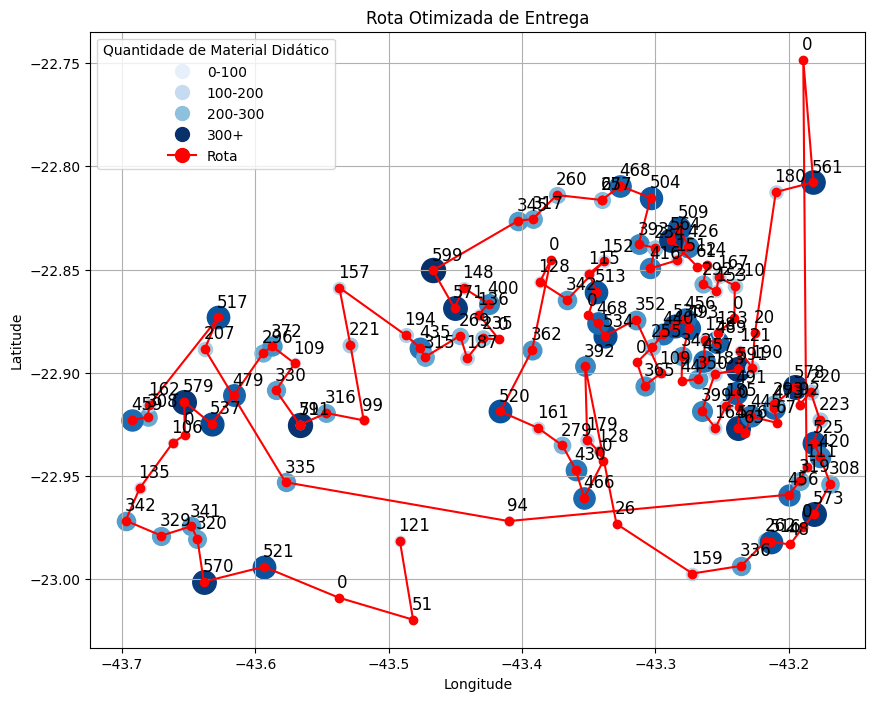

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Extraindo as latitudes e longitudes das escolas
latitudes = df_final['latitude'].astype(float)
longitudes = df_final['longitude'].astype(float)

# Normalizando a quantidade de material para o tamanho do ponto
tamanho_ponto = df_final['quantidade_material_didatico'] / df_final['quantidade_material_didatico'].max() * 300

# Definindo intervalos para a quantidade de material
quantidade_intervalos = [0, 100, 200, 300, np.inf]
rotulos_legenda = ['0-100', '101-200', '201-300', '300+']

# Criando um gráfico de dispersão (scatter plot) para os pontos das escolas com gradiente de cor
plt.figure(figsize=(10, 8))

for i in range(len(latitudes)):
    plt.scatter(
        longitudes[i],
        latitudes[i],
        marker='o',
        color=plt.cm.Blues(tamanho_ponto[i] / tamanho_ponto.max()),
        s=tamanho_ponto[i],
        label=f'{df_final["quantidade_material_didatico"].iloc[i]}'
    )

    # Ajustando a posição do rótulo
    deslocamento_vertical = 0.005
    deslocamento_horizontal = -0.001
    plt.annotate(
        df_final['quantidade_material_didatico'].iloc[i],
        (longitudes[i] + deslocamento_horizontal, latitudes[i] + deslocamento_vertical),
        fontsize=12
    )

# Traçando a rota com base na melhor_rota
melhor_rota = df_final['melhor_rota'].tolist()
rota_latitudes = latitudes[melhor_rota]
rota_longitudes = longitudes[melhor_rota]

# Criando o gráfico de dispersão (scatter plot) para a rota com gradiente de cor
plt.plot(
    rota_longitudes,
    rota_latitudes,
    linestyle='-',
    marker='o',
    color='red',
    label='Rota'
)

# Definindo rótulos para os eixos
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adicionando título ao gráfico
plt.title('Rota Otimizada de Entrega')

# Criando legenda com cores representando os intervalos de quantidade de material
legendas_por_intervalo = []

for i in range(len(quantidade_intervalos) - 1):
    cor = plt.cm.Blues((quantidade_intervalos[i] + quantidade_intervalos[i + 1]) / (2 * df_final['quantidade_material_didatico'].max()))
    legenda = f'{quantidade_intervalos[i]}-{quantidade_intervalos[i + 1]}' if quantidade_intervalos[i + 1] < np.inf else f'{quantidade_intervalos[i]}+'
    legendas_por_intervalo.append(plt.Line2D([0], [0], marker='o', color=cor, label=legenda, markersize=10, linestyle=''))

legendas_por_intervalo.append(plt.Line2D([0], [0], marker='o', color='red', label='Rota', markersize=10, linestyle='-'))

plt.legend(handles=legendas_por_intervalo, title='Quantidade de Material Didático')

# Exibindo o gráfico
plt.grid(True)
plt.show()

In [54]:
import folium
import networkx as nx

# Criar um gráfico direcionado para representar a rota
G = nx.DiGraph()

# Adicionar arestas com base na melhor_rota
melhor_rota = df_final['melhor_rota'].tolist()
for i in range(len(melhor_rota) - 1):
    origem = melhor_rota[i]
    destino = melhor_rota[i + 1]
    G.add_edge(origem, destino)

# Criar um mapa
m = folium.Map(location=[-22.88088, -43.22532], zoom_start=12)

# Adicionar marcadores para as escolas
for index, row in df_final.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['nome_escola'],
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Adicionar linhas para a rota
for origem, destino in G.edges():
    origem_lat = df_final.loc[df_final['melhor_rota'] == origem, 'latitude'].values[0]
    origem_lon = df_final.loc[df_final['melhor_rota'] == origem, 'longitude'].values[0]
    destino_lat = df_final.loc[df_final['melhor_rota'] == destino, 'latitude'].values[0]
    destino_lon = df_final.loc[df_final['melhor_rota'] == destino, 'longitude'].values[0]

    folium.PolyLine(
        locations=[(origem_lat, origem_lon), (destino_lat, destino_lon)],
        color='red',
        weight=2
    ).add_to(m)

# Exibir o mapa
m
